In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/medications.csv")

In [3]:
types = data[['PATIENT', 'CODE', 'DISPENSES']]

In [4]:
category_group = types.groupby(['PATIENT', 'CODE'])

In [5]:
medication_list = ['314076', '310798', '308136']

In [6]:
patient_list = data[data.CODE.isin(medication_list)]
patients = pd.DataFrame(patient_list)
group = patients.groupby(patients.PATIENT.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Therapy Count'})
group

,index,Therapy Count
0,0036adf8-ac09-4118-b967-4d5ef4b84021,32
1,003a2aa1-0f33-4ad9-997a-ca627facc35f,2
2,0040de92-6ece-4693-ac4b-940b8bc07f01,244
3,00579eaa-e6d5-40c3-a180-7e4fa2ffc6a7,142
4,00613327-1022-49e9-a4af-e39ac36d1c97,80
...,...,...
3337,ff480273-738a-49a3-9f7d-3b1021472877,86
3338,ff710560-2f7a-4636-b8a5-f080c4ecd5f0,34
3339,ffc49d89-5541-46af-9358-18112faebf57,147
3340,ffd2b2d3-b733-4a56-8245-47b6d3d2dfe0,128


In [7]:
patient_freq = patients[['PATIENT', 'CODE']].drop_duplicates(keep=False)
dataa = pd.DataFrame(patient_freq)
group = dataa.groupby(dataa.PATIENT.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Therapy Count'})

In [8]:
group

,index,Therapy Count
0,045cf2aa-4279-4a20-8813-416bbb7c8d55,2
1,096eddee-89ad-46c0-9db7-f9c0643eb167,2
2,186061c0-6e2b-4ca1-a8b9-8c6e095a76b4,2
3,223e8058-b9dd-4b79-9c26-268d1b184dc4,2
4,2aa960e8-cc73-4965-9041-bc1ee2320db0,2
5,382c7274-487a-411b-9c7e-54d5325920e8,2
6,3c8b8c1e-45b3-47ef-b83b-4e61b162c82a,1
7,43d0726a-0b66-4ae7-83b6-ac09cf95c930,1
8,4f4a082e-89ee-4cb1-a59c-65e63e5790c5,1
9,5346104a-ef06-474a-8b14-476f3e94d1e7,3


In [10]:
num_therapy = group['Therapy Count'].value_counts()
label_therapy = ['Dual-', 'Mono-', 'Tri-']
num_therapy

2    20
1    17
3     4
Name: Therapy Count, dtype: int64

Text(0.5, 1.0, 'Therapy')

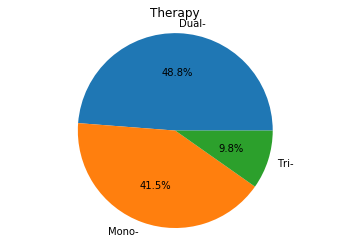

In [11]:
fig, ax = plt.subplots()
ax.pie(num_therapy, labels=label_therapy, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Therapy')

In [12]:
nums_med = patients['DESCRIPTION'].value_counts()
stats_med = patients['DESCRIPTION'].value_counts().keys()

Text(0.5, 1.0, 'Frequency of Medication')

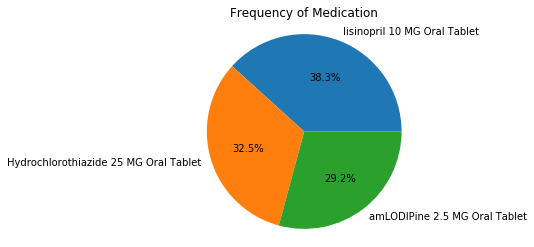

In [13]:
fig, ax = plt.subplots()
ax.pie(nums_med, labels=stats_med, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Frequency of Medication')